In [ ]:
import torch
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report
import pandas as pd
from tensorflow.keras.applications import resnet50
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from keras.optimizers import Adam
from keras.layers import Conv2D, GlobalAveragePooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras.models import Model,Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers

## **Opening and shaping data**

In [ ]:
train_data = np.load('CIFAKE_Train.npz')
test_data = np.load('CIFAKE_Test.npz')

In [ ]:
X_train = train_data['images']
y_train = train_data['labels']

X_test = test_data['images']
y_test = test_data['labels']

label_names = train_data['label_names']

In [ ]:
print("Training Dataset")
x=np.array(X_train)
print(x.shape)
y=to_categorical(y_train) # onehot encoding of the labels
print(y.shape)

# Validation Dataset
print("Validation Dataset")
val_images=np.array(X_test)
print(val_images.shape)
val_image_label=to_categorical(y_test) # onehot encoding of the labels)
print(val_image_label.shape)

Training Dataset
(100000, 32, 32, 3)
(100000, 2)
Validation Dataset
(20000, 32, 32, 3)
(20000, 2)


## **Building and training the model**

In [ ]:
# initializing model with weights='imagenet
model_resnet=resnet50.ResNet50(weights='imagenet')

# displays the summary to see the properties of the model
#model_resnet.summary()

102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
# prepares  input layer
input_layer=layers.Input(shape=(32,32,3))

# initializes the transfer model ResNet50
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)

# See the summary of the model with our properties.
#resnet_model.summary()

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# takes out last layer
last_layer=resnet_model.output

# Add flatten layer
flatten=layers.Flatten()(last_layer)


# Add dense layer to the final output layer
output_layer=layers.Dense(2,activation='softmax')(flatten)

# Creating modle with input and output layer
model=models.Model(inputs=input_layer,outputs=output_layer)

# Summarize the model
#model.summary()

In [ ]:
# we will freez all the layers except the last layer
# we are making all the layers intrainable except the last layer
for layer in model.layers[:-1]:
    layer.trainable=False
#model.summary()

In [ ]:
# # trains the model
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=5)
pd.DataFrame(ytest).head(3)

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0


In [ ]:
# Compilies the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer='adam',metrics=['accuracy'])

In [ ]:
# Fits the Model
#model.fit(x,y,epochs=10,batch_size=1000,verbose=True,validation_data=(val_images,val_image_label))
history = model.fit(xtrain,ytrain,epochs=10,batch_size=1000,verbose=True,validation_data=(xtest,ytest))
history

Epoch 1/10
80/80 [==============================] - 396s 5s/step - loss: 0.6473 - accuracy: 0.7484 - val_loss: 0.4219 - val_accuracy: 0.8334
Epoch 2/10
80/80 [==============================] - 375s 5s/step - loss: 0.3787 - accuracy: 0.8467 - val_loss: 0.3600 - val_accuracy: 0.8579
Epoch 3/10
80/80 [==============================] - 379s 5s/step - loss: 0.3358 - accuracy: 0.8640 - val_loss: 0.3341 - val_accuracy: 0.8670
Epoch 4/10
80/80 [==============================] - 386s 5s/step - loss: 0.3152 - accuracy: 0.8716 - val_loss: 0.3230 - val_accuracy: 0.8690
Epoch 5/10
80/80 [==============================] - 377s 5s/step - loss: 0.3021 - accuracy: 0.8764 - val_loss: 0.3147 - val_accuracy: 0.8717
Epoch 6/10
80/80 [==============================] - 384s 5s/step - loss: 0.2937 - accuracy: 0.8798 - val_loss: 0.3059 - val_accuracy: 0.8758
Epoch 7/10
80/80 [==============================] - 378s 5s/step - loss: 0.2868 - accuracy: 0.8825 - val_loss: 0.3013 - val_accuracy: 0.8759
Epoch 8/10
80

## **Plot of Accuracy vs. Epoch**

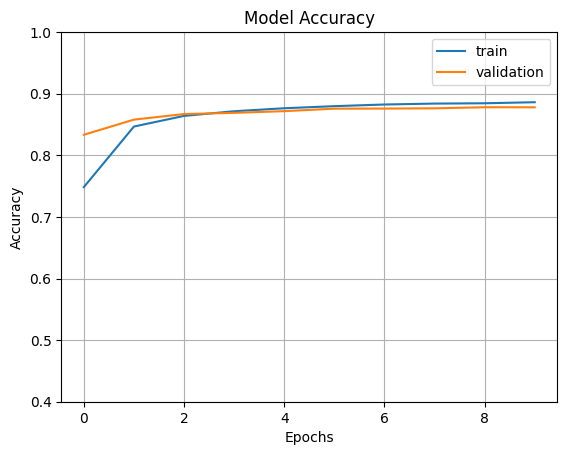

In [ ]:
import matplotlib.pyplot as plt
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()


## **Making Predictions**

In [ ]:
# # Function to make predictions. img_name is the image we want to make a prediction on
# def predict(img_name):
#     img=image.load_img(img_name,target_size=(100,100))
#     img=image.img_to_array(img)
#     plt.imshow(img.astype('int32'))
#     plt.show()
#     img=resnet50.preprocess_input(img)
#     prediction=model.predict(img.reshape(1,100,100,3))
#     output=np.argmax(prediction)
#     print(class_names[output])